In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.set_printoptions(precision=3, suppress=True)

# Credit Approval Data Set
## Numpy implementation
[Data Source](https://archive.ics.uci.edu/ml/datasets/Credit+Approval)

In [2]:
#if you have not data locally, use this

#import data
#data.download_credit_ds()

In [3]:
credit = np.genfromtxt("data/credit-approval.csv", dtype=str, delimiter=',')
categorical_indexes = [0,3,4,5,6,12]
numerical_indexes = [1,2,7,10,13,14]
bool_indexes = [8,9,11,15]

## Task 1
Fix nan values

In [4]:
def mode(array : np.ndarray):     
    values, counts = np.unique(array[array != '?'], return_counts=True)       
    return values[np.argmax(counts)]  

for i in categorical_indexes:
    credit[credit[:,i] == '?',i] = mode(credit[:,i])

for i in bool_indexes:
    credit[credit[:,i] == '?',i] = mode(credit[:,i])

for i in numerical_indexes:    
    values = credit[credit[:,i] != '?',i].astype('float')
    credit[credit[:,i] == '?',i] = np.mean(values)

In [5]:
def map_bool(row):
    result = []
    
    tf = {'t': 1, 'f': 0}
    pm = {'+': 1, '-': 0}
    
    for i in bool_indexes[:-1]:
        result.append(tf[row[i]])
    result.append(pm[row[15]])
    
    return result
    

credit[:,bool_indexes] = np.apply_along_axis(map_bool, axis=1, arr=credit)

## Task 6
One-hot encoding

In [6]:
def one_hot_encoding(data):
    labels = np.unique(data)    
    result = np.zeros((data.size, labels.size))
    for i in range(labels.size):
        result[data == labels[i], i] = 1
    return result

In [7]:
for i in categorical_indexes:
    one_hot = one_hot_encoding(credit[:,i])
    credit = np.hstack((credit, one_hot))

mask = np.ones(credit.shape[1], dtype=bool)
mask[categorical_indexes] = False
credit = credit[:,mask]

numerical_indexes = [0,1,2,5,7,8]
bool_indexes = [3,4,6,9]
del categorical_indexes

In [8]:
credit = credit.astype('float')

## Task 2
Normalize data

In [9]:
def norm_normalize(array):
    return array / np.linalg.norm(array, axis=0)

def min_max_normalize(array):    
    shift = array - np.min(array, axis=0)
    return np.divide(shift, np.max(array, axis=0) - np.min(array, axis=0))

def mean_normalize(array):
    shift = array - np.mean(array, axis=0)
    return np.divide(shift, np.max(array, axis=0) - np.min(array, axis=0))

def standardize(array):
    shift = array - np.mean(array, axis=0)
    return np.divide(shift, np.std(array, axis=0))

In [10]:
norm_normalize(credit[:,numerical_indexes])

array([[0.035, 0.   , 0.012, 0.007, 0.031, 0.   ],
       [0.066, 0.025, 0.029, 0.042, 0.006, 0.004],
       [0.028, 0.003, 0.014, 0.   , 0.042, 0.006],
       ...,
       [0.029, 0.075, 0.019, 0.007, 0.03 , 0.   ],
       [0.02 , 0.001, 0.   , 0.   , 0.042, 0.005],
       [0.04 , 0.019, 0.079, 0.   , 0.   , 0.   ]])

In [11]:
min_max_normalize(credit[:,numerical_indexes])

array([[0.257, 0.   , 0.044, 0.015, 0.101, 0.   ],
       [0.675, 0.159, 0.107, 0.09 , 0.021, 0.006],
       [0.162, 0.018, 0.053, 0.   , 0.14 , 0.008],
       ...,
       [0.173, 0.482, 0.07 , 0.015, 0.1  , 0.   ],
       [0.063, 0.007, 0.001, 0.   , 0.14 , 0.007],
       [0.32 , 0.121, 0.291, 0.   , 0.   , 0.   ]])

In [12]:
mean_normalize(credit[:,numerical_indexes])

array([[-0.011, -0.17 , -0.034, -0.021,  0.009, -0.01 ],
       [ 0.408, -0.011,  0.029,  0.054, -0.071, -0.005],
       [-0.106, -0.152, -0.025, -0.036,  0.048, -0.002],
       ...,
       [-0.095,  0.312, -0.008, -0.021,  0.008, -0.01 ],
       [-0.205, -0.163, -0.077, -0.036,  0.048, -0.003],
       [ 0.052, -0.049,  0.213, -0.036, -0.092, -0.01 ]])

In [13]:
standardize(credit[:,numerical_indexes])

array([[-0.062, -0.957, -0.291, -0.288,  0.105, -0.195],
       [ 2.288, -0.06 ,  0.244,  0.741, -0.82 , -0.088],
       [-0.597, -0.856, -0.216, -0.494,  0.558, -0.037],
       ...,
       [-0.533,  1.757, -0.067, -0.288,  0.093, -0.195],
       [-1.152, -0.915, -0.653, -0.494,  0.558, -0.051],
       [ 0.29 , -0.278,  1.814, -0.494, -1.07 , -0.195]])

In [14]:
credit[:,numerical_indexes] = min_max_normalize(credit[:,numerical_indexes])

## Task 3
Build a bar plot by one of the features (count of items in the 10 bins)

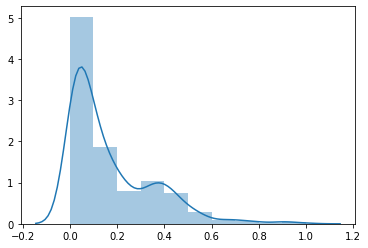

In [15]:
sns.distplot(credit[:,1], bins=10)

## Task 4
Build lineplot of two numerical features

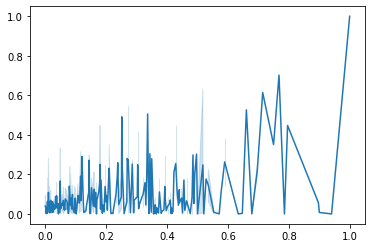

In [16]:
data = credit[credit[:,1].argsort(),:]
sns.lineplot(x=data[:,1], y=data[:,2])

## Task 5
Calculate Pearson's and Spearman's correlations

In [17]:
pearson_corr = np.corrcoef(credit[:,numerical_indexes].T)
pearson_corr

array([[ 1.   ,  0.201,  0.393,  0.186, -0.077,  0.019],
       [ 0.201,  1.   ,  0.299,  0.271, -0.222,  0.123],
       [ 0.393,  0.299,  1.   ,  0.322, -0.076,  0.051],
       [ 0.186,  0.271,  0.322,  1.   , -0.12 ,  0.064],
       [-0.077, -0.222, -0.076, -0.12 ,  1.   ,  0.066],
       [ 0.019,  0.123,  0.051,  0.064,  0.066,  1.   ]])

In [18]:
def rank(array : np.ndarray):
    sorted = array.argsort(axis=0)    
    result = np.empty_like(sorted)    
    for i in range(array.shape[1]):
        result[sorted[:,i],i] = np.arange(array.shape[0])
    return result

spearman_corr = np.corrcoef(rank(credit[:,numerical_indexes]).T)
spearman_corr

array([[ 1.   ,  0.115,  0.253,  0.138, -0.013,  0.054],
       [ 0.115,  1.   ,  0.266,  0.222, -0.295,  0.122],
       [ 0.253,  0.266,  1.   ,  0.351, -0.045,  0.142],
       [ 0.138,  0.222,  0.351,  1.   , -0.136,  0.446],
       [-0.013, -0.295, -0.045, -0.136,  1.   , -0.083],
       [ 0.054,  0.122,  0.142,  0.446, -0.083,  1.   ]])

## Task 7
Visualize data

Text(0.5, 0, '7')

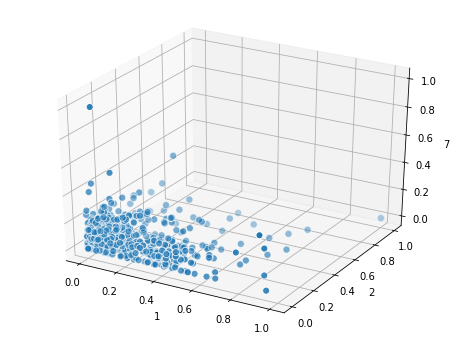

In [19]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

xs = credit[:,1]
ys = credit[:,2]
zs = credit[:,7]
ax.scatter(xs, ys, zs, s=50, edgecolors='w')

ax.set_xlabel('1')
ax.set_ylabel('2')
ax.set_zlabel('7')